# Regressão Polinomial com Scikit-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [2]:
# 1. Nossos dados de observação de carros
# X representa a hora do dia (simplificado)
X_raw = [5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22]
# y representa a quantidade de carros observados
y = [5, 8, 20, 25, 19, 25, 45, 60, 61, 59, 57, 58, 63, 69, 55, 23]

# Scikit-learn espera um array 2D para o X
X = np.array(X_raw).reshape(-1, 1)


In [4]:
# --- Modelo 1: Regressão Linear Simples ---
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# --- Modelo 2: Regressão Polinomial ---
# Vamos testar uma curva de grau 4
grau_polinomio = 4

# Usamos um 'pipeline' para encadear os passos:
# 1. Criar as features polinomiais (X, X², X³, X⁴)
# 2. Aplicar a Regressão Linear nessas novas features
modelo_polinomial = make_pipeline(PolynomialFeatures(degree=grau_polinomio), LinearRegression())
modelo_polinomial.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

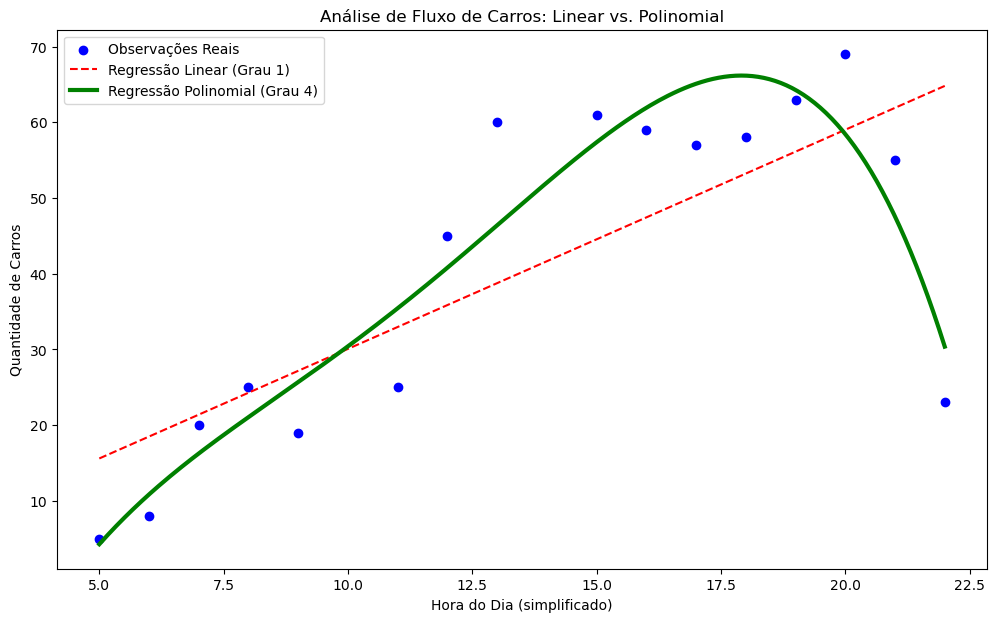

In [5]:
# --- Visualização dos Resultados ---

# Criamos um X contínuo para desenhar uma curva suave
X_continuo = np.linspace(min(X_raw), max(X_raw), 300).reshape(-1, 1)

# Previsões dos dois modelos
y_pred_linear = modelo_linear.predict(X_continuo)
y_pred_polinomial = modelo_polinomial.predict(X_continuo)

plt.figure(figsize=(12, 7))
# Dados originais
plt.scatter(X, y, color='blue', label='Observações Reais')
# Linha do modelo linear
plt.plot(X_continuo, y_pred_linear, color='red', linestyle='--', label='Regressão Linear (Grau 1)')
# Curva do modelo polinomial
plt.plot(X_continuo, y_pred_polinomial, color='green', linewidth=3, label=f'Regressão Polinomial (Grau {grau_polinomio})')

plt.title('Análise de Fluxo de Carros: Linear vs. Polinomial')
plt.xlabel('Hora do Dia (simplificado)')
plt.ylabel('Quantidade de Carros')
plt.legend()
plt.show()


# Código de Avaliação

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score

# Para avaliar, precisamos das previsões para os pontos X originais
y_pred_linear_treino = modelo_linear.predict(X)
y_pred_polinomial_treino = modelo_polinomial.predict(X)

# Calculando as métricas para o Modelo Linear
mae_linear = mean_absolute_error(y, y_pred_linear_treino)
r2_linear = r2_score(y, y_pred_linear_treino)

# Calculando as métricas para o Modelo Polinomial
mae_polinomial = mean_absolute_error(y, y_pred_polinomial_treino)
r2_polinomial = r2_score(y, y_pred_polinomial_treino)

print("--- Comparação de Performance dos Modelos ---")
print("\nModelo de Regressão Linear Simples:")
print(f"  Erro Médio Absoluto (MAE): {mae_linear:.2f} carros")
print(f"  Coeficiente de Determinação (R²): {r2_linear:.4f}")

print("\nModelo de Regressão Polinomial (Grau 4):")
print(f"  Erro Médio Absoluto (MAE): {mae_polinomial:.2f} carros")
print(f"  Coeficiente de Determinação (R²): {r2_polinomial:.4f}")


--- Comparação de Performance dos Modelos ---

Modelo de Regressão Linear Simples:
  Erro Médio Absoluto (MAE): 10.92 carros
  Coeficiente de Determinação (R²): 0.5446

Modelo de Regressão Polinomial (Grau 4):
  Erro Médio Absoluto (MAE): 5.98 carros
  Coeficiente de Determinação (R²): 0.8937


# Fazendo Previsão


--- Previsão de Fluxo ---
Para a hora 14, nosso modelo prevê um fluxo de aproximadamente 52 carros.


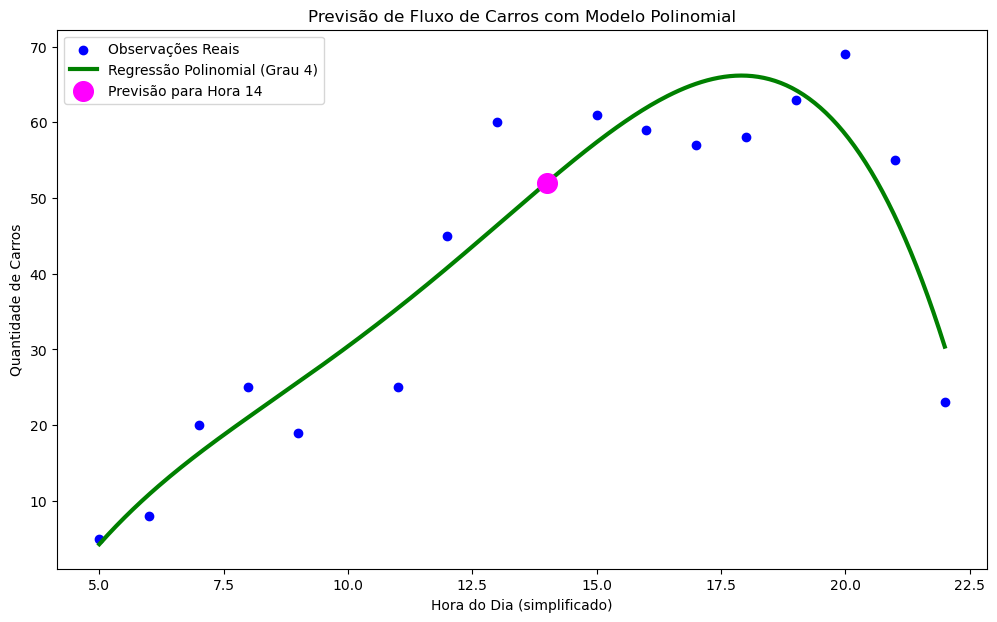

In [8]:
# A hora que queremos prever
hora_para_prever = 14

# Precisamos formatar este número para o formato que o Scikit-learn espera (um array 2D)
X_novo = np.array([[hora_para_prever]])
# Usamos o modelo POLINOMIAL para fazer a previsão
previsao_fluxo = modelo_polinomial.predict(X_novo)

# O resultado é um array, então pegamos o primeiro elemento e arredondamos
fluxo_estimado = int(previsao_fluxo[0])

print(f"\n--- Previsão de Fluxo ---")
print(f"Para a hora {hora_para_prever}, nosso modelo prevê um fluxo de aproximadamente {fluxo_estimado} carros.")

# Vamos adicionar essa previsão ao nosso gráfico para visualização
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='blue', label='Observações Reais')
plt.plot(X_continuo, y_pred_polinomial, color='green', linewidth=3, label=f'Regressão Polinomial (Grau {grau_polinomio})')
# Adicionando o ponto da nossa previsão
plt.scatter(hora_para_prever, previsao_fluxo, color='magenta', s=200, zorder=5, label=f'Previsão para Hora {hora_para_prever}')
plt.title('Previsão de Fluxo de Carros com Modelo Polinomial')
plt.xlabel('Hora do Dia (simplificado)')
plt.ylabel('Quantidade de Carros')
plt.legend()
plt.show()


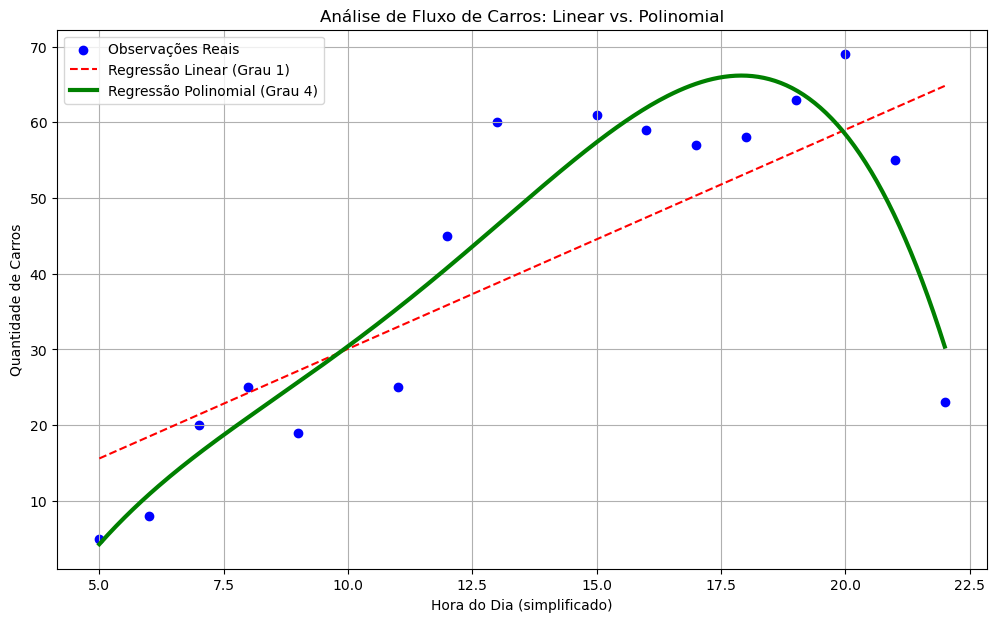

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Nossos dados de observação de carros
# X representa a hora do dia (simplificado)
X_raw = [5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22]
# y representa a quantidade de carros observados
y = [5, 8, 20, 25, 19, 25, 45, 60, 61, 59, 57, 58, 63, 69, 55, 23]

# Scikit-learn espera um array 2D para o X
X = np.array(X_raw).reshape(-1, 1)

# --- Modelo 1: Regressão Linear Simples ---
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# --- Modelo 2: Regressão Polinomial ---
# Vamos testar uma curva de grau 4
grau_polinomio = 4

# Usamos um 'pipeline' para encadear os passos:
# 1. Criar as features polinomiais (X, X², X³, X⁴)
# 2. Aplicar a Regressão Linear nessas novas features
modelo_polinomial = make_pipeline(PolynomialFeatures(degree=grau_polinomio), LinearRegression())
modelo_polinomial.fit(X, y)


# --- Visualização dos Resultados ---

# Criamos um X contínuo para desenhar uma curva suave
X_continuo = np.linspace(min(X_raw), max(X_raw), 300).reshape(-1, 1)

# Previsões dos dois modelos
y_pred_linear = modelo_linear.predict(X_continuo)
y_pred_polinomial = modelo_polinomial.predict(X_continuo)

plt.figure(figsize=(12, 7))
# Dados originais
plt.scatter(X, y, color='blue', label='Observações Reais')
# Linha do modelo linear
plt.plot(X_continuo, y_pred_linear, color='red', linestyle='--', label='Regressão Linear (Grau 1)')
# Curva do modelo polinomial
plt.plot(X_continuo, y_pred_polinomial, color='green', linewidth=3, label=f'Regressão Polinomial (Grau {grau_polinomio})')

plt.title('Análise de Fluxo de Carros: Linear vs. Polinomial')
plt.xlabel('Hora do Dia (simplificado)')
plt.ylabel('Quantidade de Carros')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = [5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22]
y = [5, 8, 20, 25, 19, 25, 45, 60, 61, 59, 57, 58, 63, 69, 55, 23]

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Create and train the linear model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Plot the results
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred, color='red', label="Polynomial Regression (degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression")
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 5  6  7  8  9 11 12 13 15 16 17 18 19 20 21 22].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.